In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Codigos Python\Base de dados\Coffe_sales.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_timedelta(df['Time'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   hour_of_day  3547 non-null   int64          
 1   cash_type    3547 non-null   object         
 2   money        3547 non-null   float64        
 3   coffee_name  3547 non-null   object         
 4   Time_of_Day  3547 non-null   object         
 5   Weekday      3547 non-null   object         
 6   Month_name   3547 non-null   object         
 7   Weekdaysort  3547 non-null   int64          
 8   Monthsort    3547 non-null   int64          
 9   Date         3547 non-null   datetime64[ns] 
 10  Time         3547 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5), timedelta64[ns](1)
memory usage: 304.9+ KB


In [15]:
# Padronizar nomes das colunas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [16]:
# Identificar valores ausentes e duplicados
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
time_of_day    0
weekday        0
month_name     0
weekdaysort    0
monthsort      0
date           0
time           0
dtype: int64


In [18]:
# Engenharia de Atributos
# Criar coluna DateTime combinando Date e Time
df['datetime'] = df['date'] + df['time']

In [25]:
# Criar coluna dia da data, Semana do ano, Fim de semana (0=não, 1=sim)
# Venda por Minuto, Venda por Hora, Categoria de Bebida

df['Dia da Data'] = df['date'].dt.day
df['Semana do Ano'] = df['date'].dt.isocalendar().week.astype(int)
df['Fim de Semana'] = df['date'].dt.weekday.isin([5, 6]).astype(int)
df['Minuto'] = df['datetime'].dt.minute
df['Venda por Minuto'] = df.groupby('Minuto')['money'].transform('sum')
df['Hora'] = df['datetime'].dt.hour
df['Venda por Hora'] = df.groupby('Hora')['money'].transform('sum')

In [38]:
# Criar uma coluna de categoria de bebida com base no nome do café (robusto e legível)
import numpy as np

# Garantir que a coluna exista e trabalhar em minúsculas
x = df['coffee_name'].astype(str).str.lower()
conds = [
    x.str.contains('espresso', na=False),
    x.str.contains('latte', na=False),
    x.str.contains('cappuccino', na=False),
    x.str.contains('hot chocolate|chocolate', na=False),
    x.str.contains('cocoa|cacau', na=False),
    x.str.contains('cortado', na=False),
    x.str.contains('americano with milk|americano com leite', na=False),
    x.str.contains('americano', na=False),
]
choices = [
    'Café Expresso',
    'Café com Leite',
    'Cappuccino',
    'Chocolate Quente',
    'Cacau',
    'Cortado',
    'Americano com Leite',
    'Americano',
]

# Aplicar mapeamento com default 'Outros'
df['categoria_bebida'] = np.select(conds, choices, default='Outros')

# Exibir um resumo rápido para checar
print(df['categoria_bebida'].value_counts().head(10))

categoria_bebida
Americano com Leite    809
Café com Leite         757
Americano              564
Cappuccino             486
Cortado                287
Chocolate Quente       276
Cacau                  239
Café Expresso          129
Name: count, dtype: int64


In [39]:
# Ticket médio por Horario
df['TicketMedioHora'] = df.groupby('Hora')['money'].transform('mean')

In [40]:
# Pico de Vendas por Periodo
def periodo(h):
    if 6 <= h < 12:
        return 'Manhã'
    elif 12 <+ h < 18:
        return 'Tarde'
    elif 18 <= h < 24:
        return 'Noite'
    else:
        return 'Madrugada'
    
df ['Periodo'] = df['Hora']. apply(periodo)
df['PicoPorPeriodo'] = df.groupby('Periodo')['money'].transform('sum')

In [41]:
df.head()

,hour_of_day,cash_type,money,coffee_name,time_of_day,weekday,month_name,weekdaysort,monthsort,date,...,Semana do Ano,Fim de Semana,Minuto,Venda por Minuto,Hora,Venda por Hora,categoria_bebida,TicketMedioHora,Periodo,PicoPorPeriodo
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,...,9,0,15,2003.96,10,10198.52,Café com Leite,31.093049,Manhã,35929.20
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,...,9,0,19,2402.68,12,7419.62,Chocolate Quente,30.786805,Madrugada,7419.62
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,...,9,0,20,2339.98,12,7419.62,Chocolate Quente,30.786805,Madrugada,7419.62
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,...,9,0,46,1689.96,13,7028.76,Americano,31.238933,Tarde,38370.18
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,...,9,0,48,1926.08,13,7028.76,Café com Leite,31.238933,Tarde,38370.18


Total de vendas: (3547, 23)
Ticket Médio: R$ 31.65


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11344\2725919114.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bebidas.values, y=top_bebidas.index,


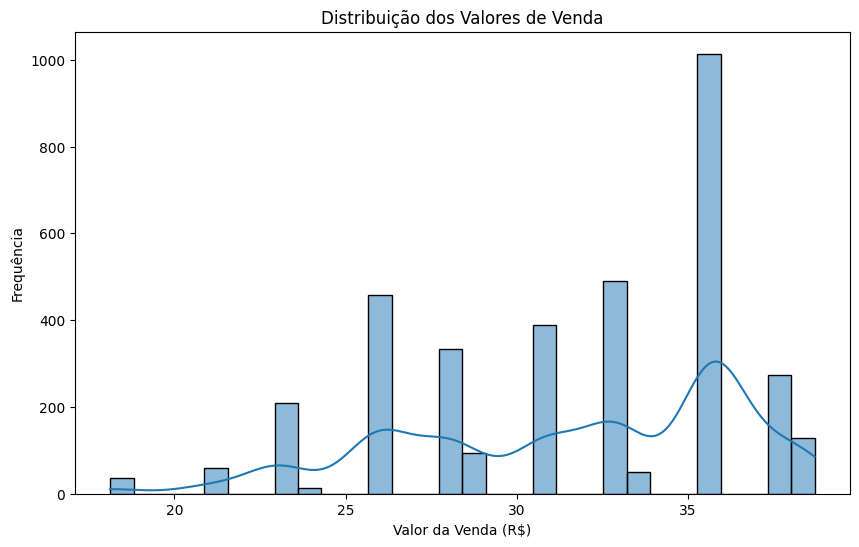

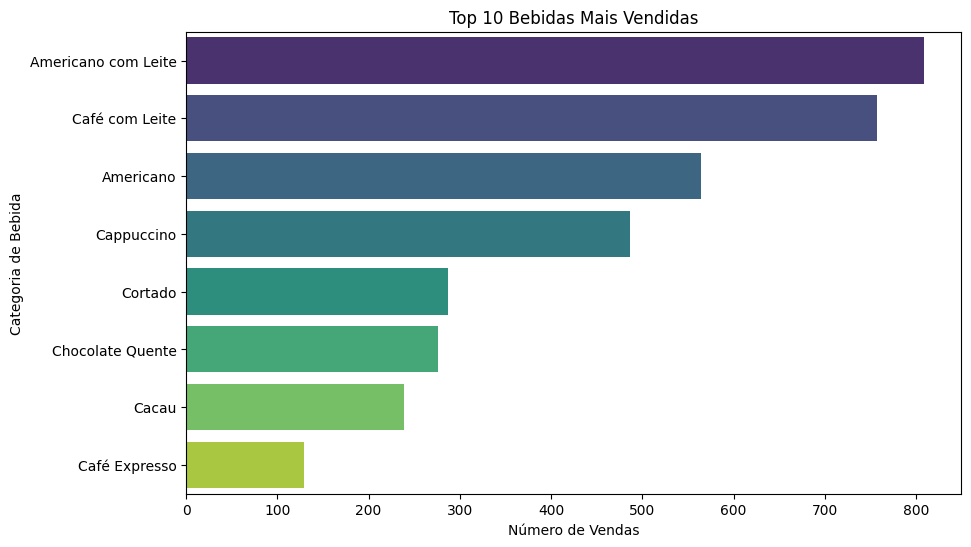

In [54]:
# EDA - Análise Exploratória de Dados

# Quantas vendas totais?
df.shape[0]
print("Total de vendas:", df.shape)

# Qual é o Ticket Médio?
ticket_medio = df['money'].mean()
print("Ticket Médio: R$", round(ticket_medio, 2))

# Analisar a distribuição dos valores de venda
plt.figure(figsize=(10, 6))
sns.histplot(df['money'], bins=30, kde=True)
plt.title('Distribuição dos Valores de Venda')
plt.xlabel('Valor da Venda (R$)')
plt.ylabel('Frequência')

# Bebidas mais Vendidas
top_bebidas = df['categoria_bebida'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bebidas.values, y=top_bebidas.index,
            palette='viridis')
plt.title('Top 10 Bebidas Mais Vendidas')
plt.xlabel('Número de Vendas')
plt.ylabel('Categoria de Bebida')
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11344\176674844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_medio_bebida.values, y=ticket_medio_bebida.index,


Text(0.5, 0, 'Ticket Médio (R$)')

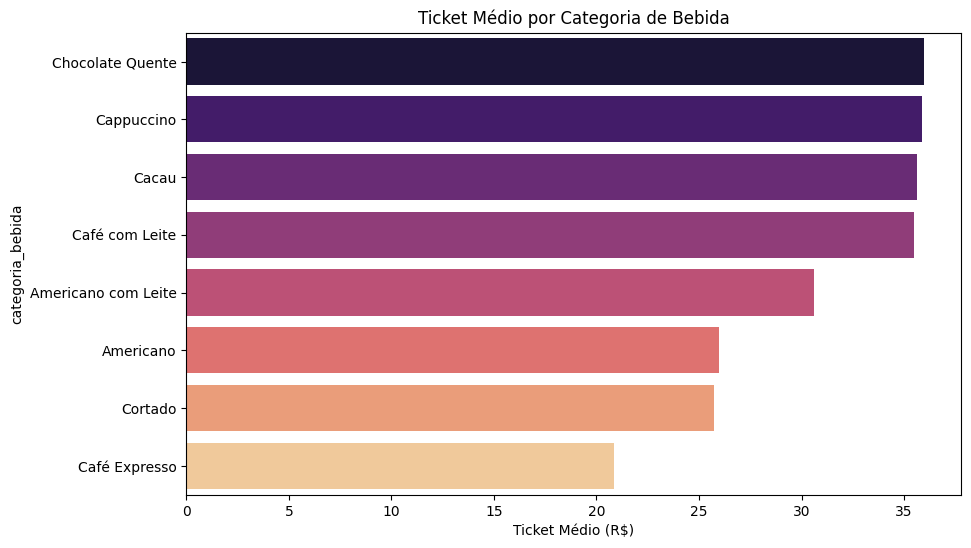

In [ ]:
# EDA Avançada

# Comparar ticket médio por bebida
ticket_medio_bebida = df.groupby('categoria_bebida')['money'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_medio_bebida.values, y=ticket_medio_bebida.index,
            palette='magma')
plt.title('Ticket Médio por Categoria de Bebida')
plt.xlabel('Ticket Médio (R$)')



Text(0, 0.5, 'Total de Vendas (R$)')

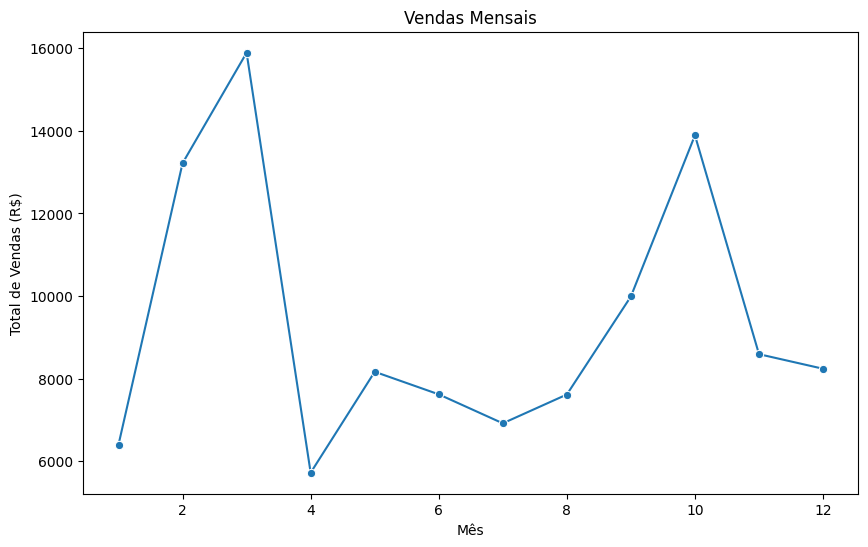

In [57]:
# Entender sazionalidade por Mês
df['Month'] = df['date'].dt.month
monthly_sales = df.groupby('Month')['money'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (R$)')



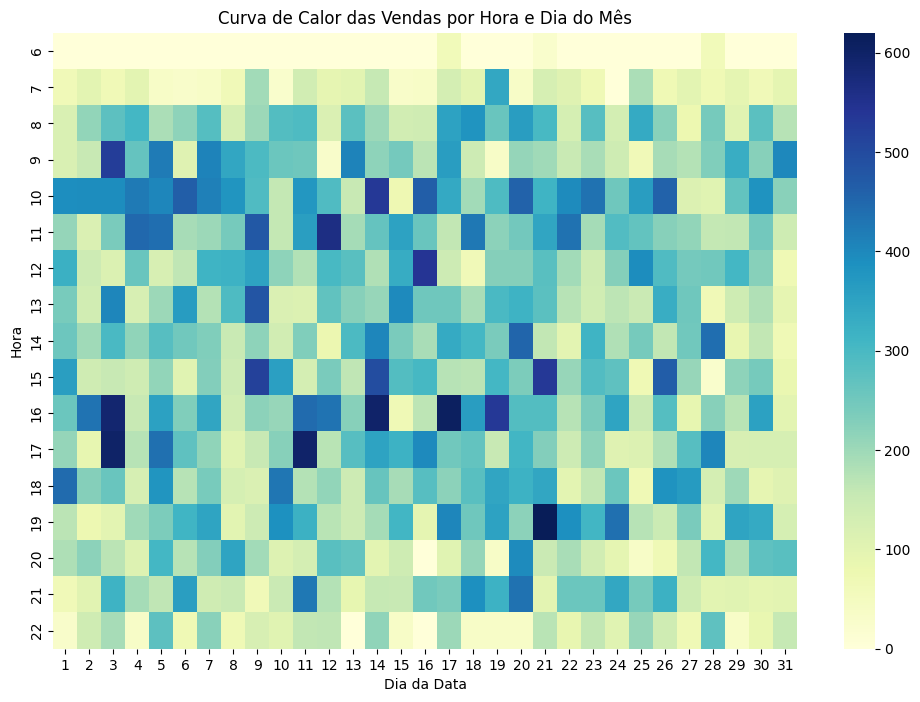

In [59]:
# Analisar curva de calor(Headmap) hora x dia
pivot_table = df.pivot_table(values='money', index='Hora', columns='Dia da Data', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Curva de Calor das Vendas por Hora e Dia do Mês')
plt.show()


In [ ]:
# Identificar horarios de pico de vendas
peak_hours = df.groupby('Hora')['money'].sum().sort_values(ascending=False).head(5)
print("Horários de Pico de Vendas:")
print(peak_hours)


Horários de Pico de Vendas:
Hora
10    10198.52
16     9067.60
11     8453.10
19     7751.96
17     7624.00
Name: money, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11344\1403002152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='coolwarm')


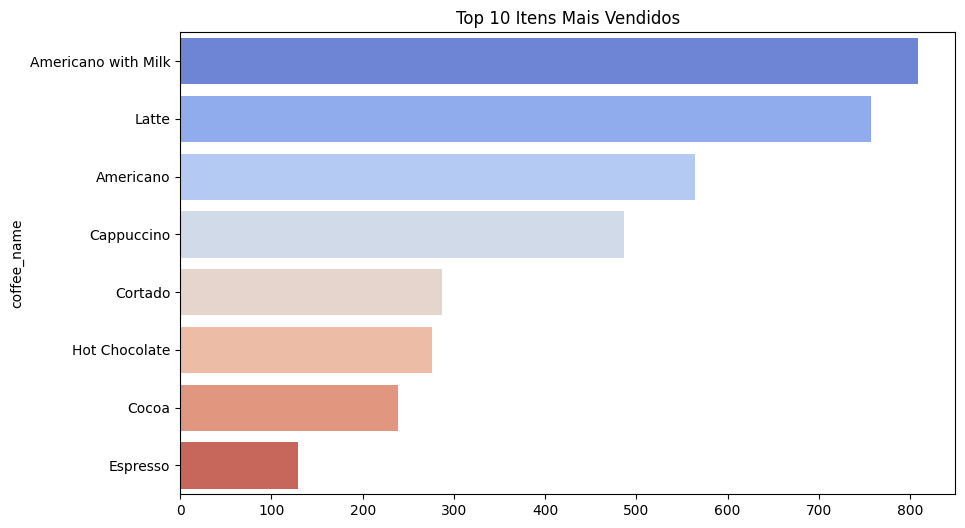

In [ ]:
# Verificar se algum item domina a receita
top_items = df['coffee_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='coolwarm')
plt.title('Top 10 Itens Mais Vendidos')
plt.show()

In [ ]:
# Analise de padrão de pagamento
df['cash_type'].value_counts()


cash_type
card    3547
Name: count, dtype: int64

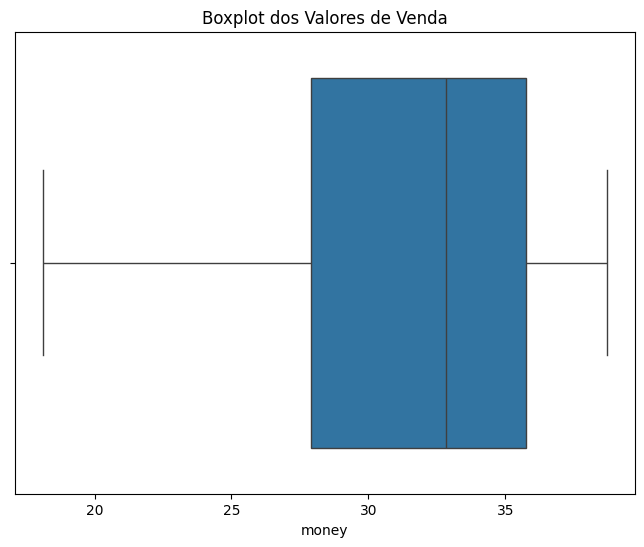

In [70]:
# Identificar anomalias nas vendas (ex: vendas muito altas ou muito baixas)
df['money'].describe()

# Plotar boxplot para visualizar anomalias
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['money'])
plt.title('Boxplot dos Valores de Venda')
plt.show()



In [ ]:
# Contrução dos KPIs Finais, Faturamento Total, Ticket Médio

print("Faturamento Total: R$", round(df['money'].sum(), 2))
print("Ticket Médio: R$", round(df['money'].mean(), 2))



Faturamento Total: R$ 112245.58
Ticket Médio: R$ 31.65


In [77]:
# Receita por Periodo do dia
receita_periodo = df.groupby('Periodo')['money'].sum()
print(receita_periodo)

Periodo
Madrugada     7419.62
Manhã        35929.20
Noite        30526.58
Tarde        38370.18
Name: money, dtype: float64


In [76]:
#Receita por Bebida

receita_bebida = df.groupby('categoria_bebida')['money'].sum()
print(receita_bebida)

categoria_bebida
Americano              14650.26
Americano com Leite    24751.12
Cacau                   8521.16
Café Expresso           2690.28
Café com Leite         26875.30
Cappuccino             17439.14
Chocolate Quente        9933.46
Cortado                 7384.86
Name: money, dtype: float64


In [79]:
# Volume de vendas por Horario
volume_vendas_hora = df.groupby('Hora')['money'].count()
print(volume_vendas_hora)

Hora
6       5
7      88
8     235
9     242
10    328
11    283
12    241
13    225
14    225
15    236
16    279
17    236
18    218
19    229
20    169
21    195
22    113
Name: money, dtype: int64


In [80]:
# Pico de Atendimento
peak_hours = df.groupby('Hora')['money'].sum().sort_values(ascending=False).head(5)
print(peak_hours)

Hora
10    10198.52
16     9067.60
11     8453.10
19     7751.96
17     7624.00
Name: money, dtype: float64


In [81]:
# Vendas por dia da Semana
vendas_dia_semana = df.groupby(df['date'].dt.day_name())['money'].sum()
print(vendas_dia_semana)

date
Friday       16802.66
Monday       17363.10
Saturday     14733.52
Sunday       13336.06
Thursday     16091.40
Tuesday      18168.38
Wednesday    15750.46
Name: money, dtype: float64


In [86]:
# Variação por Mês
monthly_variation = df.groupby('Month')['money'].sum()
print(monthly_variation)


Month
1      6398.86
2     13215.48
3     15891.64
4      5719.56
5      8164.42
6      7617.76
7      6915.94
8      7613.84
9      9988.64
10    13891.16
11     8590.54
12     8237.74
Name: money, dtype: float64


In [ ]:
# Participação de recita por categoria de bebida
participacao_receita = (receita_bebida / receita_bebida.sum()) * 100
print(participacao_receita)

categoria_bebida
Americano              13.051971
Americano com Leite    22.050864
Cacau                   7.591533
Café Expresso           2.396780
Café com Leite         23.943304
Cappuccino             15.536594
Chocolate Quente        8.849756
Cortado                 6.579199
Name: money, dtype: float64


In [90]:
# Ranking das bebidas mais lucrativas
ranking_bebidas = receita_bebida.sort_values(ascending=False)
print(ranking_bebidas)

categoria_bebida
Café com Leite         26875.30
Americano com Leite    24751.12
Cappuccino             17439.14
Americano              14650.26
Chocolate Quente        9933.46
Cacau                   8521.16
Cortado                 7384.86
Café Expresso           2690.28
Name: money, dtype: float64


In [91]:
# Descarregar dados tratados
df.to_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Codigos Python\Vendas_Automotivas\Analise_Vendas_Cafeteria\Coffe_sales_tratado.csv", index=False)